In [0]:
# Mounting google drive to import the data

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# change to the datasets folder present in the mounted drive
%cd /content/drive/My Drive/DataSets

In [11]:
# check for data file
!ls

911.csv		 groupStudy.csv   housingData-Real.csv	meshgrid-contour.py
CleanupData.csv  HousingData.csv  loanData.csv		Social_Network_Ads.csv


In [0]:
# import all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# usage of inline plotting
%matplotlib inline

In [0]:
# load data from csv file
dataFrame= pd.read_csv('911.csv')

In [16]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [17]:
# check head for our dataframe
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [19]:
# top 5 zip codes
dataFrame['zip'].value_counts().head()

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [22]:
# top 6 twp reaching to 911
dataFrame['twp'].value_counts().head(6)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
POTTSTOWN       12039
Name: twp, dtype: int64

In [25]:
# unique reasong for calling
dataFrame['title'].nunique()

131

In [0]:
# breaking up the title into specific and broad reason
dataFrame['SpecificReason']= dataFrame['title'].apply(lambda title: title.split(':')[1])
dataFrame['BroadReason']= dataFrame['title'].apply(lambda title: title.split(':')[0])

In [36]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


In [33]:
dataFrame['SpecificReason'].value_counts().head(10)

 VEHICLE ACCIDENT -       68123
 DISABLED VEHICLE -       20667
 VEHICLE ACCIDENT         16747
 FIRE ALARM               16359
 RESPIRATORY EMERGENCY    14637
 FALL VICTIM              14584
 CARDIAC EMERGENCY        14491
 ROAD OBSTRUCTION -        8767
 SUBJECT IN PAIN           8151
 HEAD INJURY               7613
Name: SpecificReason, dtype: int64

In [39]:
# broad reasons
dataFrame['BroadReason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: BroadReason, dtype: int64

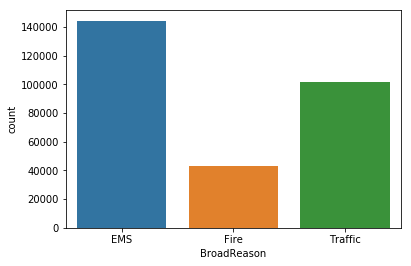

In [40]:
# Plot a count plot for broad reason
sns.countplot(x='BroadReason', data=dataFrame)

In [45]:
# convert timpeStamp from object to actual timeStamp
dataFrame['timeStamp']= pd.to_datetime(dataFrame['timeStamp'])
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 11 columns):
lat               289240 non-null float64
lng               289240 non-null float64
desc              289240 non-null object
zip               253942 non-null float64
title             289240 non-null object
timeStamp         289240 non-null datetime64[ns]
twp               289137 non-null object
addr              289240 non-null object
e                 289240 non-null int64
SpecificReason    289240 non-null object
BroadReason       289240 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 24.3+ MB


In [0]:
# create 3 colums Hour, Month and day of week
dataFrame['Hour']= dataFrame['timeStamp'].apply(lambda time: time.hour)
dataFrame['Month']= dataFrame['timeStamp'].apply(lambda time: time.month)
dataFrame['Day']= dataFrame['timeStamp'].apply(lambda time: time.dayofweek)

In [52]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadReason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,3


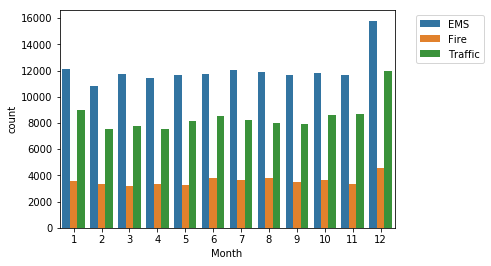

In [60]:
# plot a graph for month
sns.countplot(x='Month', data=dataFrame, hue='BroadReason')
plt.legend(bbox_to_anchor=(1.05, 1))

In [0]:
# use groupby
byMonth= dataFrame.groupby('Month').count()

In [62]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadReason,Hour,Day
Month,,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065,24065
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856,23856
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657,23657
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001,23001


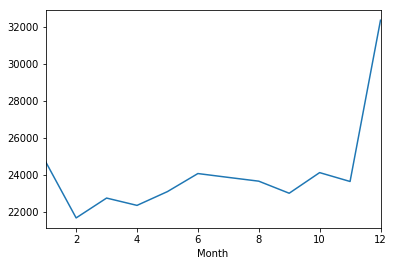

In [63]:
byMonth['twp'].plot()

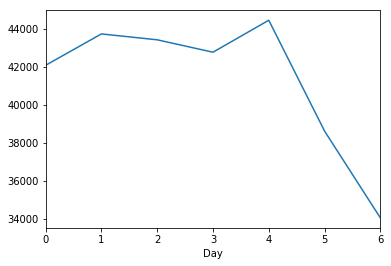

In [65]:
byDay= dataFrame.groupby('Day').count()
byDay['twp'].plot()